In [ ]:
#Importing necessay libraries
import nltk
nltk.download("all", quiet=True)
import re, string
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [ ]:
#Importing the csv file into pandas dataframe
df = pd.read_csv("https://drive.usercontent.google.com/u/0/uc?id=1P9Pj_YorjQiV1XLdFBuY55bmsR4QKKE9&export=download")

In [ ]:
#Inspecting first five rows
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


# Data Pre-processing


In [ ]:
#Checking for the columns in the dataframe
df.columns


Index(['Unnamed: 0', 'title', 'text', 'label'], dtype='object')

In [ ]:
#Lets rename the first column Unnamed: 0 to Index
df = df.rename(columns={'Unnamed: 0': 'Index'})


In [ ]:
#Verifying the change
df.columns


Index(['Index', 'title', 'text', 'label'], dtype='object')

In [ ]:
# Lets see the length of unique value in Index column and length of entire dataframe
print(len(df[df.columns[0]].unique()))
print(len(df))

6335
6335


In [ ]:
#Setting column 0 as index of dataframe
df = df.set_index(df.columns[0])

In [ ]:
#Verifying the change
df.columns

Index(['title', 'text', 'label'], dtype='object')

In [ ]:
#Lets inspect the changes in our orginal dataframe
df.head()

,title,text,label
Index,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
#Checking the label column in the dataframe
df.label

Index
8476     FAKE
10294    FAKE
3608     REAL
10142    FAKE
875      REAL
         ... 
4490     REAL
8062     FAKE
8622     FAKE
4021     REAL
4330     REAL
Name: label, Length: 6335, dtype: object

In [ ]:
#Lets check the unique values in label columns
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [ ]:
#Lets see the title of the first news in the dataframe
df['title'].iloc[0]

'You Can Smell Hillary’s Fear'

In [ ]:
#Lets check the string length of the first news text
len(df['text'].iloc[0])

7518

In [ ]:
#Lets see whats inside the text of the first news
df['text'].iloc[0]

'Daniel Greenfield, a Shillman Journalism Fellow at the Freedom Center, is a New York writer focusing on radical Islam. \nIn the final stretch of the election, Hillary Rodham Clinton has gone to war with the FBI. \nThe word “unprecedented” has been thrown around so often this election that it ought to be retired. But it’s still unprecedented for the nominee of a major political party to go war with the FBI. \nBut that’s exactly what Hillary and her people have done. Coma patients just waking up now and watching an hour of CNN from their hospital beds would assume that FBI Director James Comey is Hillary’s opponent in this election. \nThe FBI is under attack by everyone from Obama to CNN. Hillary’s people have circulated a letter attacking Comey. There are currently more media hit pieces lambasting him than targeting Trump. It wouldn’t be too surprising if the Clintons or their allies were to start running attack ads against the FBI. \nThe FBI’s leadership is being warned that the entir

In [ ]:
#Lets see the label of first news
df['label'].iloc[0]

'FAKE'

In [ ]:
#create a new colum label_num by changing the news labels real = 1 and fake = 0
df['label_num'] = df['label'].replace({'REAL': 1, 'FAKE': 0})

In [ ]:
#Lets verify the changes
df['label_num'].value_counts()

label_num
1    3171
0    3164
Name: count, dtype: int64

In [ ]:
#Adding necessary sign into the punctuation
string.punctuation = string.punctuation +'“'+'”'+'-'+'’'+'‘'+'—' #Adding these signs into the punctuation
string.punctuation = string.punctuation.replace('.', '') #Replacing all . with empty string ''

#Function to remove new line \n character and punctuation from the text
def preprocess_text(text):
  """
    Make a single news string by removing punctuations and newline \n character from the text

    Args:
        text: String

    Returns:
        sents: a single string
    """

  line_nl_removed = text.replace("\n", " ") #removes newlines
  chars = "".join([char.lower() for char in line_nl_removed if char not in string.punctuation]) #Iterate over each character to remove punctuation
  sents = ''

  for sent in sent_tokenize(chars):
    sents += sent.replace(".", " . ")

  return sents

In [ ]:
#Function to tokenize the string into words
def word_token(text):
    """
    Make a list of tokenized words

    Args:
        text: String

    Returns:
        List of tokens
    """
    stemmer = PorterStemmer()
    stopwords_english = stopwords.words('english') #stop words
    word_token = []
    for word in word_tokenize(text):
      if (word not in stopwords_english and  word not in string.punctuation and  word.isalpha()):
        stem_word = stemmer.stem(word)  # stemming word
        word_token.append(stem_word)

    return word_token

In [ ]:
#Consolidated function to pre-process the news text into word tokens
def clean_word_tokens(text):
  """
    Make a list of tokenized words

    Args:
        text: String

    Returns:
        List of tokens
    """
  news_text = preprocess_text(text) #Cleaning the news texts

  word_tokens = word_token(news_text) #Tokenizing the text

  return word_tokens

In [ ]:
#Checking the function on first news text
filter_first_news = clean_word_tokens(df['text'][:1])
print(filter_first_news)

['daniel', 'greenfield', 'shillman', 'journal', 'fellow', 'freedom', 'center', 'new', 'york', 'writer', 'focus', 'radic', 'islam', 'final', 'stretch', 'elect', 'hillari', 'rodham', 'clinton', 'gone', 'war', 'fbi', 'word', 'unpreced', 'thrown', 'around', 'often', 'elect', 'ought', 'retir', 'still', 'unpreced', 'nomine', 'major', 'polit', 'parti', 'go', 'war', 'fbi', 'exactli', 'hillari', 'peopl', 'done', 'coma', 'patient', 'wake', 'watch', 'hour', 'cnn', 'hospit', 'bed', 'would', 'assum', 'fbi', 'director', 'jame', 'comey', 'hillari', 'oppon', 'elect', 'fbi', 'attack', 'everyon', 'obama', 'cnn', 'hillari', 'peopl', 'circul', 'letter', 'attack', 'comey', 'current', 'media', 'hit', 'piec', 'lambast', 'target', 'trump', 'surpris', 'clinton', 'alli', 'start', 'run', 'attack', 'ad', 'fbi', 'fbi', 'leadership', 'warn', 'entir', 'establish', 'form', 'lynch', 'mob', 'continu', 'go', 'hillari', 'fbi', 'credibl', 'attack', 'media', 'democrat', 'preemptiv', 'head', 'result', 'investig', 'clinton',

In [ ]:
#Applying clean_word_token function to create filtered and tokens with new column text_sentences in df
df['text_sentences'] = df['text'].apply(clean_word_tokens)

In [ ]:
#Lets check our processed dataframe for the final time
df.head()

,title,text,label,label_num,text_sentences
Index,,,,,
8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,0,"[daniel, greenfield, shillman, journal, fellow..."
10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,0,"[googl, pinterest, digg, linkedin, reddit, stu..."
3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,1,"[u, secretari, state, john, f, kerri, said, mo..."
10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,0,"[kayde, king, kaydeek, novemb, lesson, tonight..."
875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,1,"[primari, day, new, york, frontrunn, hillari, ..."


Train Test Split

In [ ]:
#Train test split with 70% training data and 30% testing data
from sklearn.model_selection import train_test_split

X = df['text_sentences']
y = df['label_num']

# Split the data into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

# Print the shapes of the training and testing sets to verify
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (4434,) (4434,)
Testing set shape: (1901,) (1901,)


In [ ]:
#Checking the type of training samples
type(X_train)

pandas.core.series.Series

Computing frequency dictionary

In [ ]:
#Function to calculate the Pair Frequency dictionary as (word,label), count
def count_news_text(x_data, y_data):
    '''
    Input:
        x_data: a series of list of tokenized news text
        y_data: a series of news labels (either 0 or 1)
    Output:
        freq_dict: a dictionary mapping each pair to its frequency
    '''
    freq_dict = {} #a dictionary that will be used to map each pair to its frequency
    for news, y in zip(x_data,y_data):
        for word in news:
            # define the key, which is the word and label tuple
            pair = (word, int(y))

            # if the key exists in the dictionary, increment the count
            if pair in freq_dict:
                freq_dict[pair] += 1

            # else, if the key is new, add it to the dictionary and set the count to 1
            else:
                freq_dict[pair] = 1

    return freq_dict

In [ ]:
# Computing frequency dictionary on training data
frequency_dictionary = count_news_text(X_train, y_train)
frequency_dictionary

{('leav', 0): 540,
 ('repli', 0): 124,
 ('kate', 0): 11,
 ('bartolotta', 0): 2,
 ('day', 0): 1664,
 ('age', 0): 262,
 ('constant', 0): 62,
 ('use', 0): 2295,
 ('social', 0): 606,
 ('media', 0): 1537,
 ('demand', 0): 349,
 ('label', 0): 99,
 ('defin', 0): 93,
 ('other', 0): 506,
 ('everi', 0): 880,
 ('way', 0): 1461,
 ('possibl', 0): 682,
 ('import', 0): 677,
 ('understand', 0): 447,
 ('true', 0): 399,
 ('mean', 0): 890,
 ('word', 0): 585,
 ('introvert', 0): 17,
 ('lot', 0): 480,
 ('peopl', 0): 3727,
 ('shi', 0): 12,
 ('interchang', 0): 5,
 ('dont', 0): 1220,
 ('thing', 0): 1209,
 ('someon', 0): 346,
 ('work', 0): 1607,
 ('time', 0): 2803,
 ('youd', 0): 31,
 ('think', 0): 1415,
 ('id', 0): 125,
 ('extrovert', 0): 4,
 ('im', 0): 507,
 ('friendli', 0): 71,
 ('get', 0): 1946,
 ('close', 0): 580,
 ('limit', 0): 277,
 ('shut', 0): 117,
 ('quiet', 0): 46,
 ('hole', 0): 74,
 ('good', 0): 904,
 ('book', 0): 393,
 ('love', 0): 441,
 ('help', 0): 1008,
 ('there', 0): 366,
 ('huge', 0): 183,
 ('re

In [ ]:
#Function the create closed vocabulary
def get_words_with_nplus_frequency(frequency_dictionary, count_threshold):
    """
    Find the words that appear N times or more

    Args:
        frequency_dictionary: Dictionary of word count with labels as (words,label): count
        count_threshold: minimum number of occurrences for a word to be in the closed vocabulary.

    Returns:
        close_vocab: List of words that appear N times or more
    """
    # Initialize an empty list to contain the words that
    # appear at least 'minimum_freq' times.
    closed_vocab = []
    for (word, label), count in frequency_dictionary.items():
        if count>=count_threshold:
          closed_vocab.append(word)

    return closed_vocab

In [ ]:
#Creating close vocabulary from training samples
train_close_vocabulary = get_words_with_nplus_frequency(frequency_dictionary,5)

In [ ]:
#Function to replace out of vocabulary words i.e the words with frequency less that N or count threshold
def replace_oov_words_by_unk(data, vocabulary, unknown_token="<unk>"):
    """
    Replace words not in the given vocabulary with '<unk>' token.

    Args:
        data: pandas series containing list of words
        vocabulary: List of strings that we will use
        unknown_token: A string representing unknown (out-of-vocabulary) words

    Returns:
        List of strings, with words not in the vocabulary replaced
    """

    # Place vocabulary into a set for faster search
    vocabulary = set(vocabulary)

    # Initialize the list that will contain
    # a single list with "unknown_token" replacements
    replaced_row = []

    # Go through each row of the series
    for token in data: # complete this line

      # Check if the token is in the closed vocabulary
      if token in vocabulary: # complete this line
        # If so, append the word to the replaced_row
        replaced_row.append(token)
      else:
        # otherwise, append the unknown token instead
        replaced_row.append(unknown_token)


    return replaced_row

In [ ]:
#Replacing less frequent words with "<unk>" on training data
X_train_replaced = X_train.apply(replace_oov_words_by_unk, vocabulary = train_close_vocabulary)

In [ ]:
#Lets verify the replacement for first training sample
#You must see '<unk>' in the list
for word in X_train_replaced[:1]:
  print(word)


['leav', 'repli', 'kate', '<unk>', 'day', 'age', 'constant', 'use', 'social', 'media', 'demand', 'label', 'defin', 'other', 'everi', 'way', 'possibl', 'import', 'understand', 'true', 'mean', 'use', 'word', 'introvert', 'lot', 'peopl', 'use', 'word', 'introvert', 'shi', 'interchang', 'dont', 'mean', 'thing', 'someon', 'work', 'peopl', 'time', 'youd', 'think', 'id', '<unk>', 'im', 'friendli', 'im', 'shi', 'get', 'close', 'peopl', 'time', 'limit', 'time', 'shut', 'quiet', 'hole', 'good', 'book', 'love', 'help', 'peopl', 'there', 'huge', 'reason', 'balanc', 'type', 'work', 'work', 'get', 'quiet', 'dive', 'work', 'word', 'instead', 'bombard', 'interact', '<unk>', 'dont', 'fall', 'old', '<unk>', 'introvert', 'spent', 'year', 'feel', 'guilti', 'want', 'spend', 'time', 'alon', 'instead', 'thing', 'friend', 'learn', 'make', 'best', 'often', 'push', '<unk>', 'felt', 'exhaust', 'mani', 'peopl', '<unk>', 'tend', 'prize', 'societi', '<unk>', 'seen', 'secondclass', 'person', 'trait', 'somewher', 'di

In [ ]:
#Replacing less frequent words with "<unk>" in testing data
X_test_replaced = X_test.apply(replace_oov_words_by_unk, vocabulary = train_close_vocabulary)

In [ ]:
#Lets verify the replacement on the first testing sample
#You must see '<unk>' in the list
for word in X_test_replaced[:1]:
  print(word)

['year', 'explos', 'accus', 'patient', 'die', 'wait', 'appoint', 'va', 'medic', 'center', 'phoenix', 'arizona', 'administr', 'path', 'make', 'health', 'care', 'access', 'america', 'veteran', 'remain', 'shaki', 'ground', 'critic', 'say', 'program', 'roll', 'give', 'certain', 'veteran', 'option', '<unk>', 'privat', 'care', 'experienc', 'seriou', 'bump', 'accord', 'report', 'vet', 'taken', 'advantag', 'choic', 'card', 'program', 'sinc', 'launch', 'novemb', 'technic', 'elig', 'see', 'nonva', 'doctor', 'veteran', 'must', 'least', 'mile', 'away', 'nearest', 'va', 'hospit', 'wait', 'least', 'day', 'appoint', 'veteran', 'group', 'say', 'confus', 'elig', 'remain', 'big', 'problem', 'everyon', 'qualifi', 'vet', 'thought', 'would', 'report', 'turn', 'away', 'say', 'process', 'isnt', 'clear', 'bureaucrat', 'red', 'tape', 'led', 'conflict', 'messag', 'veteran', 'whether', 'access', 'system', 'other', 'gotten', 'respons', 'werent', 'help', 'air', 'forc', 'veteran', 'pat', '<unk>', 'exampl', 'told', 

Training our Naive Bayes Model on training data

In [ ]:

#Function to calculate logprior and loglikelihood
def train_naive_bayes(freqs, vocabulary, train_x, train_y):
    '''
    Input:
        freqs: dictionary from (word, label) to how often the word appears
        vocabulary: list of closed vacabulary words
        train_x: a series of list of tokenized news text
        train_y: a series of labels correponding to the news (0,1)
    Output:
        logprior: the log prior log(D_positive)-log(D_negative)
        loglikelihood: dictionary containg the log likelihood of a word from Naive bayes equation. log(Prob_Pos_words/Prob_Neg_words)
    '''
    loglikelihood = {}
    logprior = 0


    # calculate V, the number of unique words in the vocabulary
    vocab = set(vocabulary)
    V = len(vocab) #Length of vocabulary

    # calculate N_pos and N_neg
    N_pos = N_neg = 0
    for pair in freqs.keys():
        # if the label is positive (greater than zero)
        if pair[1] > 0:

            # Increment the number of positive words by the count for this (word, label) pair
            N_pos += freqs[pair]

        # else, the label is negative
        else:

            # increment the number of negative words by the count for this (word,label) pair
            N_neg += freqs[pair]

    # Calculate D, the number of documents
    D = len(train_y)

    # Calculate D_pos, the number of positive documents
    D_pos = np.sum(train_y)

    # Calculate D_neg, the number of negative documents
    D_neg = D - D_pos

    # Calculate logprior
    logprior = np.log(D_pos) - np.log(D_neg)

    # For each word in the vocabulary...
    for word in vocab:
        # get the positive and negative frequency of the word
        freq_pos = freqs.get((word, 1), 0)
        freq_neg = freqs.get((word, 0), 0)

        # calculate the probability that each word is positive, and negative
        p_w_pos = (freq_pos + 1) / (N_pos + V)
        p_w_neg = (freq_neg + 1) / (N_neg + V)

        # calculate the log likelihood of the word
        loglikelihood[word] = np.log(p_w_pos / p_w_neg)

    return logprior, loglikelihood

In [ ]:
#Calculating logprior and loglikelihood
logprior, loglikelihood = train_naive_bayes(frequency_dictionary, vocabulary = train_close_vocabulary, train_x = X_train_replaced, train_y = y_train)

Predicting the class for test samples

In [ ]:
#Function to calculate the loglikelihood of each words in testing samples
def naive_bayes_predict(news, logprior, loglikelihood):
    '''
    Input:
        tweet: a string
        logprior: a number
        loglikelihood: a dictionary of words mapping to numbers
    Output:
        p: the sum of all the logliklihoods of each word in the tweet (if found in the dictionary) + logprior (a number)

    '''



    # initialize probability to zero
    p = 0

    # add the logprior
    p += logprior

    for word in news:

        # check if the word exists in the loglikelihood dictionary
        if word in loglikelihood:
            # add the log likelihood of that word to the probability
            p += loglikelihood[word]

    return p

In [ ]:
#Caculating the aum of loglikelihood, logprior and probability for each testing samples
y_logp_predict = X_test.apply(naive_bayes_predict, logprior = logprior, loglikelihood= loglikelihood)

In [ ]:
#Lets see the computed predictions
y_logp_predict

Index
3320     149.551665
5741     -50.239816
3976     168.347555
10008    -28.722059
3404     135.097553
            ...    
1398     347.382312
3430     110.879727
9335     -52.344132
774      166.720281
2726      43.369856
Name: text_sentences, Length: 1901, dtype: float64

In [ ]:
#Since loglikelihood is the sum of log probabilities for each words in the news, we assume positive value to be real news and negative to be fake news
#Lets map our loglikelihood value to 0 or 1 based on positive or negative
y_predict_map = y_logp_predict.apply(lambda y: 1 if y > 0 else 0)

In [ ]:
#Lets see the loglikelihood for each news mapped into the labels either 0 or 1
y_predict_map

Index
3320     1
5741     0
3976     1
10008    0
3404     1
        ..
1398     1
3430     1
9335     0
774      1
2726     1
Name: text_sentences, Length: 1901, dtype: int64

In [ ]:
#Lets see the actual labels of those news in test samples
y_test

Index
3320     1
5741     0
3976     1
10008    0
3404     1
        ..
1398     1
3430     1
9335     0
774      1
2726     1
Name: label_num, Length: 1901, dtype: int64

Confusion Matrix to check our model performance

In [ ]:
#Lets see the classification report to see the model performance
#Arguments
#y_test: true labels of the test silhouette_samples
#y_predict_map: predicted labels of the test samples by our model
print(classification_report(y_test,y_predict_map))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87       970
           1       0.85      0.90      0.88       931

    accuracy                           0.87      1901
   macro avg       0.88      0.88      0.87      1901
weighted avg       0.88      0.87      0.87      1901



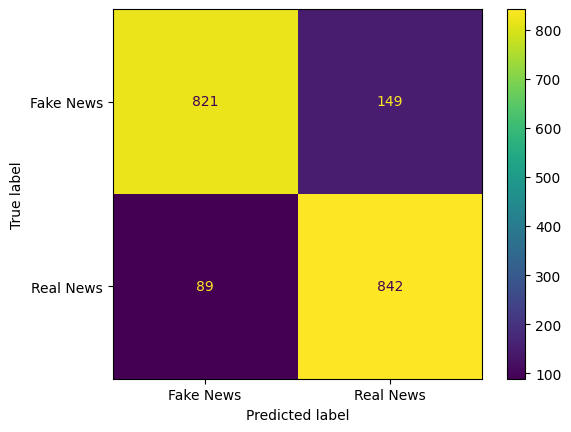

In [ ]:
#Visualizing the confusion matrix
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics

#Applyring the built in method to plot the confusion matrix for our model
actual_labels = y_test #True labels of test set
predicted_labels = y_predict_map #Predicted labels on test set by our model

#Computing the confusion matrix
confusion_matrix = metrics.confusion_matrix(actual_labels, predicted_labels)

#Displaying the matrix with Fake news and True news as labels
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Fake News", "Real News"])

cm_display.plot()
plt.show()